In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Import CSV


In [3]:
#import csv
used_car_df=pd.read_csv("vehicles.csv")

In [4]:
#set the used car data from to df for easof use
df=used_car_df


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


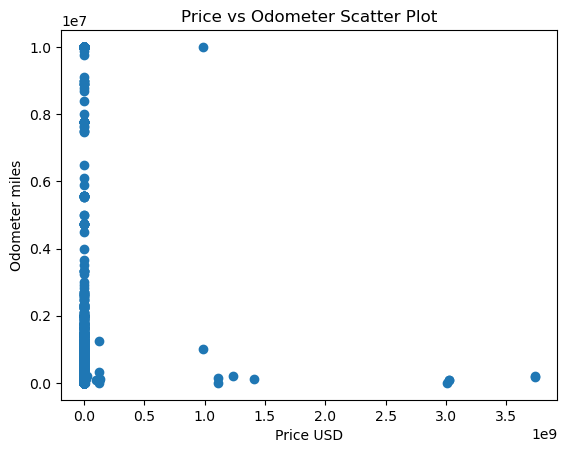

In [7]:
#scatterplot price and ocommeter to check of relationship and outliers
plt.scatter(df['price'], df['odometer'])
plt.xlabel("Price USD")  
plt.ylabel("Odometer miles")  
plt.title("Price vs Odometer Scatter Plot")  
plt.show()  

{'whiskers': [<matplotlib.lines.Line2D at 0x14de5ca50>,
 'caps': [<matplotlib.lines.Line2D at 0x14de5f350>,
 'boxes': [<matplotlib.lines.Line2D at 0x14de78f90>],
 'medians': [<matplotlib.lines.Line2D at 0x14de5f9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14de5fb10>],
 'means': []}

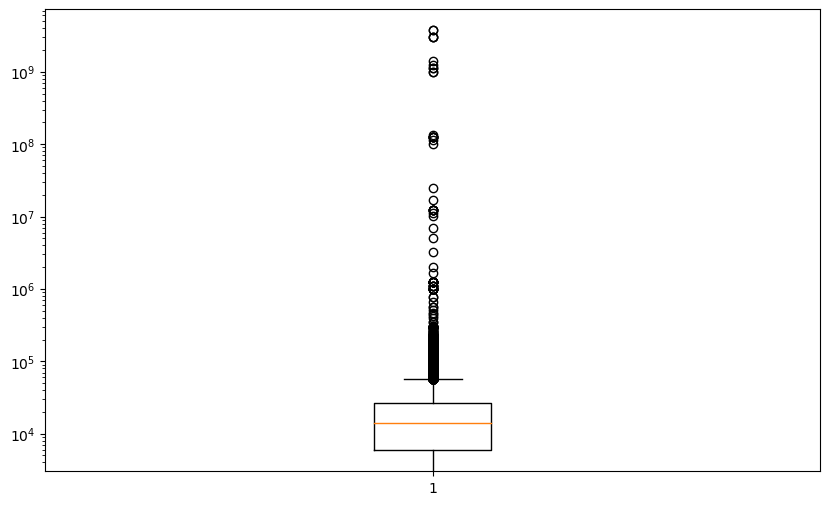

In [8]:
#box plot to check for outliers
plt.figure(figsize=(10, 6))  
plt.yscale('log')  
plt.boxplot(df['price'])

In [9]:
#remove outliers the first and third quartile
def filter_outliers(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df_filtered = df.copy()
    
    for column in numeric_columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        df_filtered = df_filtered.drop(outliers.index, errors='ignore')
    
    return df_filtered

In [10]:
df=filter_outliers(df)

{'whiskers': [<matplotlib.lines.Line2D at 0x14e88e310>,
 'caps': [<matplotlib.lines.Line2D at 0x324a40f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x14aab9090>],
 'medians': [<matplotlib.lines.Line2D at 0x324a42150>],
 'fliers': [<matplotlib.lines.Line2D at 0x14de6f450>],
 'means': []}

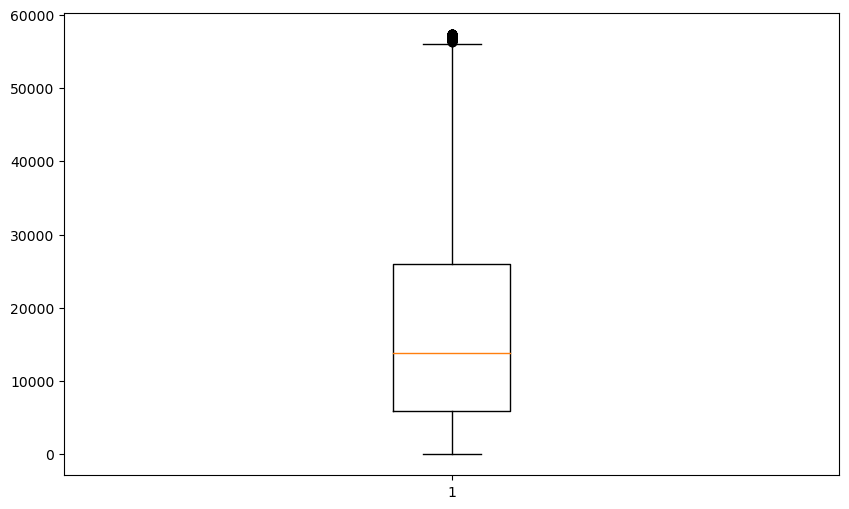

In [11]:
#check fo outliers
plt.figure(figsize=(10, 6))  # Set the figure size
plt.boxplot(df['price'])

(array([96402., 78031., 58781., 41899., 38708., 31806., 27870.,  9583.,
         6288.,  3990.]),
 array([    0. ,  5734.1, 11468.2, 17202.3, 22936.4, 28670.5, 34404.6,
        40138.7, 45872.8, 51606.9, 57341. ]),
 <BarContainer object of 10 artists>)

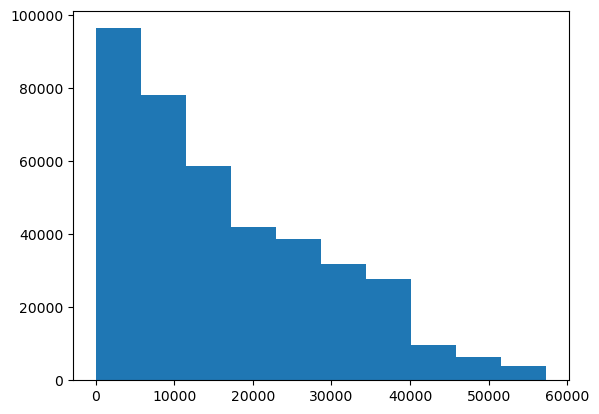

In [12]:
#check distribustion of price
plt.hist(df['price'], bins=10)

(array([68168., 62680., 55542., 60719., 52825., 41427., 25055., 13717.,
         6110.,  2891.]),
 array([     0. ,  27723.1,  55446.2,  83169.3, 110892.4, 138615.5,
        166338.6, 194061.7, 221784.8, 249507.9, 277231. ]),
 <BarContainer object of 10 artists>)

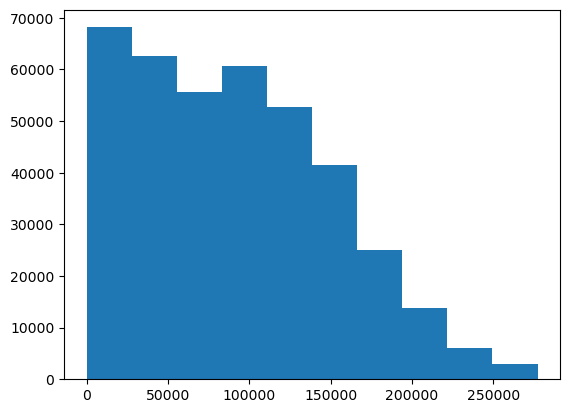

In [13]:
#check distribution of odometer
plt.hist(df['odometer'], bins=10)

In [14]:
#create frame to display the null values as a percentage of the total rows of the data frame. The missing value will display inorder of most missing values to least

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
county,county,100.000000
size,size,72.176999
cylinders,cylinders,42.055075
condition,condition,40.463395
VIN,VIN,35.952745
drive,drive,30.545966
paint_color,paint_color,30.296829
type,type,20.910977
manufacturer,manufacturer,3.387499
title_status,title_status,1.991316


In [15]:
#create a list of all the VIN numbers
vin_list = df['VIN'].dropna().tolist()


In [16]:
print(len(vin_list))

251935


In [8]:
a

NameError: name 'a' is not defined

In [ ]:
#the vin number contains information aboutthe vehicle. The VIN number can be decoded to give many of the features in this data set. There are many many other attributes the VIN number can describe.
#NHTSA has an API that can be called it can take a VIN number and return the atributes in key value pairs. 

import requests # requests allows for a http api call
from concurrent.futures import ThreadPoolExecutor, as_completed #concurrent allows the API to be called again while the results from the previous call are being retrieved , instead of one at a time. This cuts down on execution time
from tqdm import tqdm #tqdm displays a progress bar. Because of the number of vin numbers in this data set it will take hours to run. The progress bar gives a visual indication that the cell is still running normally
import pandas as pd
import time # this allows time to be added between retries

def decode_vin(vin, retries=3):# Vin is the VIN of interest and retries is the number of times the vin will be retried if there is an error
    url = f'https://vpic.nhtsa.dot.gov/api/vehicles/DecodeVin/{vin}?format=json' #api where "{vin}" is the VIN that will be ran through the API
    for attempt in range(retries):
        try:# the functtion will try a VIN number and return VIN details
            response = requests.get(url, timeout=10)
            response.raise_for_status()
            data = response.json() #data is the json recieved from the API call
            results = data.get('Results', [])# results is the data in the json 
            vin_details = {item['Variable']: item['Value'] for item in results if item['Value']}#vin details is the key value pairs from the data
            return vin, vin_details
        except requests.HTTPError as e:
            if e.response.status_code == 403:#if the error occurs it will retry 3 times as set above. this will delay the retry eachtime so the API doesnt shutdown for over attempts
                time.sleep(2 ** attempt)  # Exponential backoff
            else:
                return vin, None
        except requests.Timeout:
            time.sleep(2 ** attempt)
        except (requests.RequestException, ValueError):
            return vin, None
    return vin, None

def get_vin_details(vin_list, max_workers=80, batch_size=80, delay_between_batches=5):
    vin_data = []#adds completed vin decoder to this list
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        with tqdm(total=len(vin_list), desc="Processing VINs") as progress_bar:
            for i in range(0, len(vin_list), batch_size):
                batch_vins = vin_list[i:i + batch_size]
                tasks = [executor.submit(decode_vin, vin) for vin in batch_vins]

                for future in as_completed(tasks):
                    vin, vin_details = future.result()
                    if vin_details:#appends the info to a new list of dictionarries
                        vin_data.append({
                            "VIN": vin,
                            "Make": vin_details.get("Make"),
                            "Model": vin_details.get("Model"),
                            "Year": vin_details.get("Model Year"),
                            "Drive Type": vin_details.get("Drive Type"),
                            "Body Class": vin_details.get("Body Class"),
                            "Transmission Style": vin_details.get("Transmission Style"),
                            "Engine Number of Cylinders": vin_details.get("Engine Number of Cylinders"),
                            "Fuel Type - Primary": vin_details.get("Fuel Type - Primary")
                        })
                    else:
                        vin_data.append({
                            "VIN": vin,
                            "Make": None,
                            "Model": None,
                            "Year": None,
                            "Drive Type": None,
                            "Body Class": None,
                            "Transmission Style": None,
                            "Engine Number of Cylinders": None,
                            "Fuel Type - Primary": None
                        })
                    progress_bar.update(1)
                time.sleep(delay_between_batches)
    
    return vin_data



# Get the vin details
vin_data= get_vin_details(vin_list, max_workers=75, batch_size=75, delay_between_batches=5)

# Convert to DataFrame
decoded_vin_df= pd.DataFrame(vin_data)

# Save to CSV so this only needs to be ran 1 time
output_file_path ='decoded_vehicledetails4.csv'
decoded_vin_df.to_csv(output_file_path, index=False)

print(f"Decoded VIN details saved to {output_file_path}")


In [17]:
decoded_vin=pd.read_csv("decoded_vehicledetails4.csv")

In [18]:
decoded_vin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265838 entries, 0 to 265837
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   VIN                         265838 non-null  object 
 1   Make                        195458 non-null  object 
 2   Model                       195224 non-null  object 
 3   Year                        195461 non-null  float64
 4   Drive Type                  144142 non-null  object 
 5   Body Class                  195249 non-null  object 
 6   Transmission Style          61075 non-null   object 
 7   Engine Number of Cylinders  178112 non-null  float64
 8   Fuel Type - Primary         190609 non-null  object 
dtypes: float64(2), object(7)
memory usage: 18.3+ MB


In [19]:
decoded_vin.head()

,VIN,Make,Model,Year,Drive Type,Body Class,Transmission Style,Engine Number of Cylinders,Fuel Type - Primary
0,1G1YR3DW3B5102190,CHEVROLET,Corvette,2011.0,NaN,Convertible/Cabriolet,Manual/Standard,8.0,Gasoline
1,3LN6L2G99DR819673,LINCOLN,MKZ,2013.0,FWD/Front-Wheel Drive,Sedan/Saloon,NaN,4.0,Gasoline
2,3GTP1VEC4EG551563,GMC,Sierra,2014.0,RWD/Rear-Wheel Drive,Pickup,NaN,8.0,Gasoline
3,1C4GJXAG9LW193038,JEEP,Wrangler,2020.0,4WD/4-Wheel Drive/4x4,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,NaN,6.0,Gasoline
4,JTJBJRBZ8F2020836,LEXUS,NX,2015.0,4WD/4-Wheel Drive/4x4,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,NaN,4.0,Gasoline


In [20]:
#setting the orginal df to a new variable incase any mistakes are made it can be "reset" here without needing to read the csv
car_data1=df

In [21]:
car_data1.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [22]:
car_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393358 entries, 27 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            393358 non-null  int64  
 1   url           393358 non-null  object 
 2   region        393358 non-null  object 
 3   region_url    393358 non-null  object 
 4   price         393358 non-null  int64  
 5   year          392429 non-null  float64
 6   manufacturer  380033 non-null  object 
 7   model         389776 non-null  object 
 8   condition     234192 non-null  object 
 9   cylinders     227931 non-null  object 
 10  fuel          390593 non-null  object 
 11  odometer      389134 non-null  float64
 12  title_status  385525 non-null  object 
 13  transmission  391065 non-null  object 
 14  VIN           251935 non-null  object 
 15  drive         273203 non-null  object 
 16  size          109444 non-null  object 
 17  type          311103 non-null  object 
 18  paint_co

In [23]:
#create frame to display the null values as a percentage of the total rows of the data frame. The missing value will display inorder of most missing values to least

percent_missing = car_data1.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': car_data1.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
county,county,100.000000
size,size,72.176999
cylinders,cylinders,42.055075
condition,condition,40.463395
VIN,VIN,35.952745
drive,drive,30.545966
paint_color,paint_color,30.296829
type,type,20.910977
manufacturer,manufacturer,3.387499
title_status,title_status,1.991316


In [24]:
#rename the columns to match the full data set
decoded_vin.columns=['VIN','manufacturer','model','year','drive','type','transmission','cylinders','fuel']

In [25]:
decoded_vin.columns

Index(['VIN', 'manufacturer', 'model', 'year', 'drive', 'type', 'transmission',
       'cylinders', 'fuel'],
      dtype='object')

In [26]:
car_data1.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [27]:
#merging the two data frames on the column "VIN"
merged_df = car_data1.merge(decoded_vin, on='VIN', suffixes=('', '_subset'))

print("\nMerged DataFrame columns:")
print(merged_df.columns)

# Fill missing values in car_data1 with corresponding values from car_data2
for column in decoded_vin.columns:
    if column != 'VIN':
        subset_column = f"{column}_subset"
        if subset_column in merged_df.columns:
            car_data1[column] = car_data1[column].fillna(merged_df[subset_column])
        else:
            print(f"Column {subset_column} not found in merged_df")



Merged DataFrame columns:
Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'manufacturer_subset', 'model_subset', 'year_subset',
       'drive_subset', 'type_subset', 'transmission_subset',
       'cylinders_subset', 'fuel_subset'],
      dtype='object')


In [28]:
car_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393358 entries, 27 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            393358 non-null  int64  
 1   url           393358 non-null  object 
 2   region        393358 non-null  object 
 3   region_url    393358 non-null  object 
 4   price         393358 non-null  int64  
 5   year          393111 non-null  float64
 6   manufacturer  390111 non-null  object 
 7   model         392498 non-null  object 
 8   condition     234192 non-null  object 
 9   cylinders     334436 non-null  object 
 10  fuel          392700 non-null  object 
 11  odometer      389134 non-null  float64
 12  title_status  385525 non-null  object 
 13  transmission  391694 non-null  object 
 14  VIN           251935 non-null  object 
 15  drive         355474 non-null  object 
 16  size          109444 non-null  object 
 17  type          373648 non-null  object 
 18  paint_co

In [29]:
percent_missing = car_data1.isnull().sum() * 100 / len(car_data1)
missing_value_df = pd.DataFrame({'column_name': car_data1.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
county,county,100.000000
size,size,72.176999
condition,condition,40.463395
VIN,VIN,35.952745
paint_color,paint_color,30.296829
cylinders,cylinders,14.979230
drive,drive,9.630921
type,type,5.010703
title_status,title_status,1.991316
lat,lat,1.636169


In [30]:
#change data frame name to make "reset" easier
df=car_data1

In [31]:
#create a function that gets the unique values in each feature
def clean_unique_values(df, column_name):
    try:
        # Get unique values from the column
        unique_values = df[column_name].dropna().unique().tolist()
        
        # Clean the list (strip whitespace and convert to string)
        cleaned_values = [str(value).strip() for value in unique_values if pd.notnull(value)]
        
        # Remove duplicates using set and convert back to list
        unique_cleaned_values = list(set(cleaned_values))
        
        return unique_cleaned_values
    except KeyError:
        print(f"Column '{column_name}' not found in DataFrame.")
        return []

In [32]:
size = clean_unique_values(car_data1,"size")
paint_color = clean_unique_values(car_data1,"paint_color")
fuel = clean_unique_values(car_data1,"fuel")
drive = clean_unique_values(car_data1,"drive")
condition = clean_unique_values(car_data1,"condition")
manufacturer = clean_unique_values(car_data1,"manufacturer")
cylinders = clean_unique_values(car_data1,"cylinders")
condition = clean_unique_values(car_data1,"condition")
drive = clean_unique_values(car_data1,"drive")
transmission = drive = clean_unique_values(car_data1,"transmission")
# List of keywords lists and corresponding column names
keylists = [(size,"size"),(paint_color,"paint_color"),(fuel,"fuel"),(drive,"drive"),(condition,"condition"),(manufacturer,"manufacturer"),(cylinders,"cylinders"),(transmission,"transmission")]

In [33]:
#the descriptions are full of user written text describing the car
# Function to "read" the descriptions and search for the keywords listed above. The function extracts and fills keywords in the correct column and row
def fill_na_with_keywords(row, keylists):
    description = row['description']
    if pd.isna(description):
        return row
    for keywords, col in keylists:
        if pd.isna(row[col]):
            for keyword in keywords:
                if keyword in description.lower():
                    row[col] = keyword
                    break
    return row
# Apply the function to each row
df = df.apply(lambda row: fill_na_with_keywords(row, keylists), axis=1)
#the above function was specifically helpful for color which isnt a part of the VIN code as color can be changed


In [34]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
county,county,100.000000
size,size,67.171127
VIN,VIN,35.952745
condition,condition,16.164410
cylinders,cylinders,8.437861
paint_color,paint_color,6.503999
type,type,5.010703
drive,drive,2.861007
title_status,title_status,1.991316
lat,lat,1.636169


In [35]:
car_data2=df

In [36]:
car_data2['paint_color'].value_counts()

paint_color
red       109117
white      74287
black      60491
silver     43710
blue       33290
grey       23000
custom      7249
green       6622
brown       6064
orange      1705
yellow      1651
purple       588
Name: count, dtype: int64

In [37]:
car_data2['condition'].value_counts()

condition
good         170191
excellent     98926
new           32432
like new      19414
fair           6508
salvage        2303
Name: count, dtype: int64

In [38]:
car_data2['cylinders'].value_counts()

cylinders
6 cylinders     88564
4 cylinders     73931
8 cylinders     61420
6.0             42917
8.0             37881
4.0             25707
other           22344
4.0              1950
5 cylinders      1619
6.0              1611
10 cylinders     1346
3 cylinders       529
8.0               229
12 cylinders      119
Name: count, dtype: int64

In [39]:
#rename the the duplicated names

car_data2['cylinders']=car_data2['cylinders'].replace('8.0','4 cylinders')
car_data2['cylinders']=car_data2['cylinders'].replace('4.0','4 cylinders')
car_data2['cylinders']=car_data2['cylinders'].replace('6.0','6 cylinders')
car_data2['cylinders']=car_data2['cylinders'].replace(8.0,'4 cylinders')
car_data2['cylinders']=car_data2['cylinders'].replace(4.0,'4 cylinders')
car_data2['cylinders']=car_data2['cylinders'].replace(6.0,'6 cylinders')
car_data2['cylinders'].value_counts()

cylinders
4 cylinders     139698
6 cylinders     133092
8 cylinders      61420
other            22344
5 cylinders       1619
10 cylinders      1346
3 cylinders        529
12 cylinders       119
Name: count, dtype: int64

In [40]:
#check the values of transmission
car_data2['transmission'].value_counts()

transmission
automatic          312183
other               61795
manual              17894
Automatic             603
Manual/Standard        26
Name: count, dtype: int64

In [41]:
car_data2['transmission'] = car_data2['transmission'].replace('Manual/Standard', 'manual')
car_data2['transmission'] = car_data2['transmission'].replace('Automatic', 'automatic')
car_data2['transmission'].value_counts()

transmission
automatic    312786
other         61795
manual        17920
Name: count, dtype: int64

In [42]:
car_data2['type'].value_counts()

type
sedan                                                      83753
SUV                                                        73972
Pickup                                                     51595
pickup                                                     39755
truck                                                      30551
other                                                      20831
coupe                                                      16271
hatchback                                                  16181
wagon                                                      10328
van                                                         7957
convertible                                                 6025
Convertible/Cabriolet                                       4978
Coupe                                                       4735
mini-van                                                    4641
Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)     1237
bus                 

In [43]:
car_data2['type']=car_data2['type'].replace('Convertible/Cabriolet','convertible')
car_data2['type']=car_data2['type'].replace('Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)','SUV')
car_data2['type']=car_data2['type'].replace('Pickup','pickup')
car_data2['type']=car_data2['type'].replace('Coupe','coupe')
car_data2['type']=car_data2['type'].replace('truck','pickup')
car_data2['type'].value_counts()

type
pickup         121901
sedan           83753
SUV             75209
coupe           21006
other           20831
hatchback       16181
convertible     11003
wagon           10328
van              7957
mini-van         4641
bus               440
offroad           398
Name: count, dtype: int64

In [44]:
car_data2['drive'].value_counts()

drive
4wd                      121411
fwd                      102029
4x2                       49818
rwd                       49763
automatic                 24294
4WD/4-Wheel Drive/4x4     22217
RWD/Rear-Wheel Drive       9095
other                      1329
FWD/Front-Wheel Drive      1100
manual                     1007
AWD/All-Wheel Drive          41
Name: count, dtype: int64

In [45]:
#investigate 4x2 to determine what it represents
car_data1[car_data1['drive']=='4x2'].head(1000)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
18505,7314798771,https://fortsmith.craigslist.org/cto/d/mansfie...,fort smith,https://fortsmith.craigslist.org,11000,2013.0,ram,Silverado,good,8.0,...,NaN,Pickup,red,https://images.craigslist.org/01313_2ZQgg0isvY...,Minor body damage Interior has normal wear Mot...,NaN,ar,35.04320,-94.220400,2021-04-30T09:48:23-0500
18510,7313908837,https://fortsmith.craigslist.org/cto/d/van-bur...,fort smith,https://fortsmith.craigslist.org,5200,2008.0,dodge,nitro,NaN,8.0,...,NaN,Pickup,NaN,https://images.craigslist.org/00808_4n7Llq0rji...,This is a great running car that shifts out sm...,NaN,ar,35.45400,-94.327800,2021-04-28T12:19:36-0500
18511,7313900804,https://fortsmith.craigslist.org/cto/d/van-bur...,fort smith,https://fortsmith.craigslist.org,5400,2012.0,dodge,grand caravan,NaN,8.0,...,NaN,Pickup,NaN,https://images.craigslist.org/01414_h0A5z2cx5J...,This is a great running running van that shift...,NaN,ar,35.45400,-94.327800,2021-04-28T12:07:03-0500
18512,7313899977,https://fortsmith.craigslist.org/cto/d/van-bur...,fort smith,https://fortsmith.craigslist.org,5200,2010.0,mazda,5,NaN,8.0,...,NaN,Pickup,NaN,https://images.craigslist.org/00V0V_ibEBoF4wvs...,This is a great running SUV that shifts out sm...,NaN,ar,35.45400,-94.327800,2021-04-28T12:05:50-0500
18516,7313677939,https://fortsmith.craigslist.org/cto/d/mountai...,fort smith,https://fortsmith.craigslist.org,10500,2011.0,ram,four-door crew cab,good,8 cylinders,...,NaN,Pickup,NaN,https://images.craigslist.org/00909_7AtXKrwEvH...,"Good condition, 5.7 hemi, all power, slt packa...",NaN,ar,35.64640,-94.149700,2021-04-27T21:48:15-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23410,7303675359,https://bakersfield.craigslist.org/ctd/d/baker...,bakersfield,https://bakersfield.craigslist.org,28590,2019.0,lincoln,mkz reserve i sedan 4d,good,8.0,...,NaN,sedan,white,https://images.craigslist.org/00F0F_69QK3LXqzx...,Carvana is the safer way to buy a car During t...,NaN,ca,35.38000,-119.020000,2021-04-08T09:03:05-0700
23411,7303658310,https://bakersfield.craigslist.org/ctd/d/miami...,bakersfield,https://bakersfield.craigslist.org,0,2015.0,ford,f59 18,NaN,8.0,...,NaN,other,NaN,https://images.craigslist.org/00Q0Q_adYe7Hxn1k...,"2015 Ford F59 18 Food Truck, Catering Truck, T...",NaN,ca,25.59352,-80.361752,2021-04-08T08:36:30-0700
23412,7303651607,https://bakersfield.craigslist.org/ctd/d/las-v...,bakersfield,https://bakersfield.craigslist.org,27995,2012.0,chevrolet,express cargo 2500 3dr,NaN,8.0,...,NaN,Pickup,NaN,https://images.craigslist.org/00m0m_3K0Y7Fn4oQ...,Chevrolet* Chevy* Express*1500 *2500 *3500 Car...,NaN,ca,36.11490,-115.216100,2021-04-08T08:26:12-0700
23416,7303606715,https://bakersfield.craigslist.org/ctd/d/baker...,bakersfield,https://bakersfield.craigslist.org,36990,2019.0,lincoln,nautilus reserve sport,good,8.0,...,NaN,SUV,black,https://images.craigslist.org/00909_dOl67Zdk8N...,Carvana is the safer way to buy a car During t...,NaN,ca,35.38000,-119.020000,2021-04-08T07:11:56-0700


In [46]:
#remove duplicate types. 4x2 was named rwd after a visual inspection and a verification of nomenclature through an iternet search
car_data2['drive']=car_data2['drive'].replace('FWD/Front-Wheel Drive','fwd')
car_data2['drive']=car_data2['drive'].replace('RWD/Rear-Wheel Drive','rwd')
car_data2['drive']=car_data2['drive'].replace('4WD/4-Wheel Drive/4x4','4wd')
car_data2['drive']=car_data2['drive'].replace('AWD/All-Wheel Drive','4wd')
car_data2['drive']=car_data2['drive'].replace('4x2','rwd')
car_data2['drive']=car_data2['drive'].replace('automatic','fwd')
car_data2['drive']=car_data2['drive'].replace('manual','rwd')
car_data2['drive']=car_data2['drive'].replace('other','4wd')
car_data2['drive'].value_counts()

drive
4wd    144998
fwd    127423
rwd    109683
Name: count, dtype: int64

In [47]:
#as above
car_data1['fuel'].value_counts()

fuel
gas                            330859
other                           29271
diesel                          23879
hybrid                           5027
Gasoline                         2073
electric                         1557
Flexible Fuel Vehicle (FFV)        34
Name: count, dtype: int64

In [48]:
car_data2['fuel']=car_data2['fuel'].replace('Gasoline','gas')
car_data2['fuel']=car_data2['fuel'].replace('Flexible Fuel Vehicle (FFV)','gas')
car_data2['fuel'].value_counts()


fuel
gas         333140
other        29377
diesel       23891
hybrid        5161
electric      1568
Name: count, dtype: int64

In [49]:
#split the odometer readings into 7 bins stacked over the feature condition. 
odometer_bins=[0,25000,50000,75000,100000,125000,150000,1000000]
groups = car_data2.groupby(['condition',pd.cut(car_data2.odometer,odometer_bins)])
groups.size().unstack()
#when users self assigned conditions lower milage vehicles were assigned "good" possibly the reason the car is for sale
# vehicles with middle milage were rated as "excellent" condition
# vehicles with high milage were also assigned "good" conditions

odometer,"(0, 25000]","(25000, 50000]","(50000, 75000]","(75000, 100000]","(100000, 125000]","(125000, 150000]","(150000, 1000000]"
condition,,,,,,,
excellent,5586,9793,12638,17113,17731,14749,19134
fair,376,374,331,580,664,930,3241
good,39076,33060,19562,19521,16097,14455,26332
like new,3278,3270,2675,2879,2785,2175,2346
new,4460,4974,4533,4665,4422,3534,5459
salvage,310,343,318,391,311,271,357


In [50]:
#based on the above groupings conditions are set to assign corresponding conditions to odometer value
excellent = (car_data2["odometer"] > 75000) & (car_data2['odometer'] <= 150000)
good = (car_data2["odometer"] <= 75000) | (car_data2['odometer'] > 150000)

# Fill the missing values in the "condition" column
car_data2.loc[excellent, "condition"] = car_data2.loc[excellent, "condition"].fillna("excellent")
car_data2.loc[good, "condition"] = car_data2.loc[good, "condition"].fillna("good")

In [51]:
percent_missing = car_data2.isnull().sum() * 100 / len(car_data2)
missing_value_df = pd.DataFrame({'column_name': car_data2.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
county,county,100.000000
size,size,67.171127
VIN,VIN,35.952745
cylinders,cylinders,8.437861
paint_color,paint_color,6.503999
type,type,5.010703
drive,drive,2.861007
title_status,title_status,1.991316
lat,lat,1.636169
long,long,1.636169


In [52]:
car_filtered=car_data2

In [53]:
#most of the NAs that can be resonably filled are filled so the rest will be dropped excpet condition
car_filtered=car_filtered.dropna(subset=['year','model','type','transmission','drive','odometer','title_status','cylinders','description','fuel','manufacturer','paint_color'])
car_filtered=car_filtered.drop(columns=['id', 'url', 'region', 'region_url','VIN', 'size', 'image_url', 'description', 'county', 'lat', 'long','posting_date'])

In [54]:
percent_missing = car_filtered.isnull().sum() * 100 / len(car_filtered)
missing_value_df = pd.DataFrame({'column_name': car_filtered.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
price,price,0.0
year,year,0.0
manufacturer,manufacturer,0.0
model,model,0.0
condition,condition,0.0
cylinders,cylinders,0.0
fuel,fuel,0.0
odometer,odometer,0.0
title_status,title_status,0.0
transmission,transmission,0.0


In [55]:
df=car_filtered

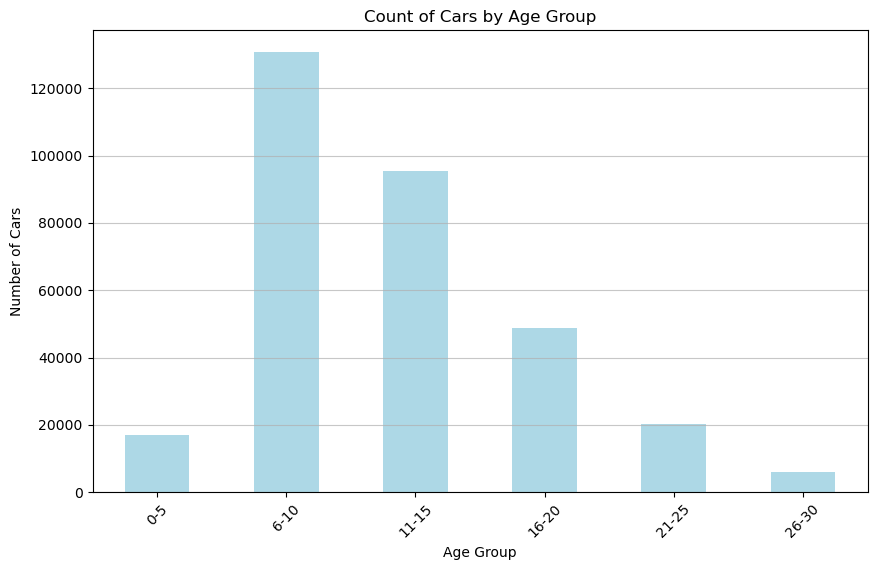

In [56]:
#group number of vechicles by age
df['age'] =2024-df['year'] #create column for age
bins = [0,5,10,15,20,25, 30] #creae 6 age bins, used .describe above to understand oldest car/oldest bin 
labels = ['0-5','6-10', '11-15', '16-20','21-25', '26-30'] #relabel bins for interpretability
df['age_group']= pd.cut(df['age'], bins=bins, labels=labels, right=False) #create column to hold the "age group"
car_counts = df['age_group'].value_counts().sort_index()  #count the number of cars in each age group

#plot number of cars by age group
plt.figure(figsize=(10, 6))
car_counts.plot(kind='bar', color='lightblue')  
plt.xlabel('Age Group')
plt.ylabel('Number of Cars')
plt.title('Count of Cars by Age Group')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='-', alpha=0.7) 
plt.show()


In [57]:
print(car_counts)

age_group
0-5       17043
6-10     130656
11-15     95545
16-20     48742
21-25     20345
26-30      6150
Name: count, dtype: int64


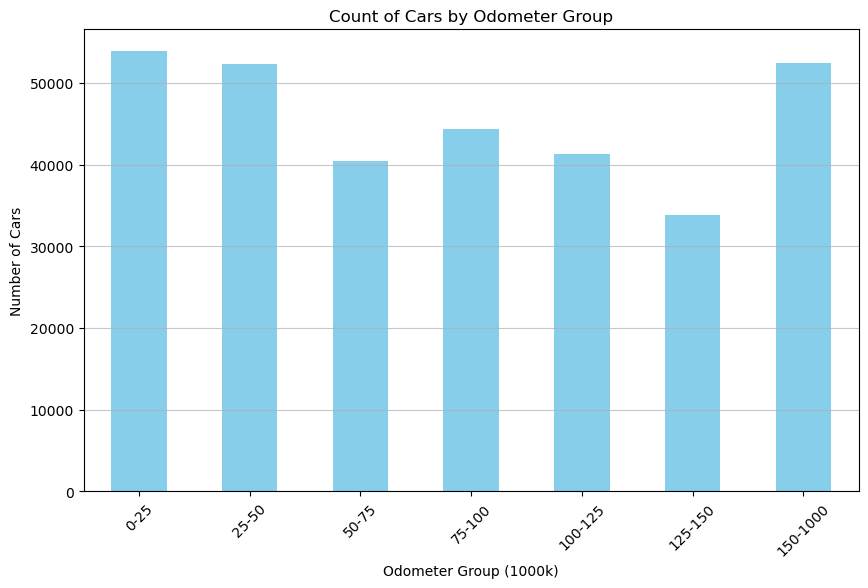

In [58]:
#repeat for odometer reading
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 1000000]
labels = ['0-25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-1000']
df['odometer_group'] = pd.cut(df['odometer'], bins=bins, labels=labels, right=False)
odometer_counts = df['odometer_group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
odometer_counts.plot(kind='bar', color='skyblue')  
plt.xlabel('Odometer Group (1000k)')
plt.ylabel('Number of Cars')
plt.title('Count of Cars by Odometer Group')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='-', alpha=0.7)  
plt.show()


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '0-5'),
  Text(1, 0, '6-10'),
  Text(2, 0, '11-15'),
  Text(3, 0, '16-20'),
  Text(4, 0, '21-25'),
  Text(5, 0, '26-30')])

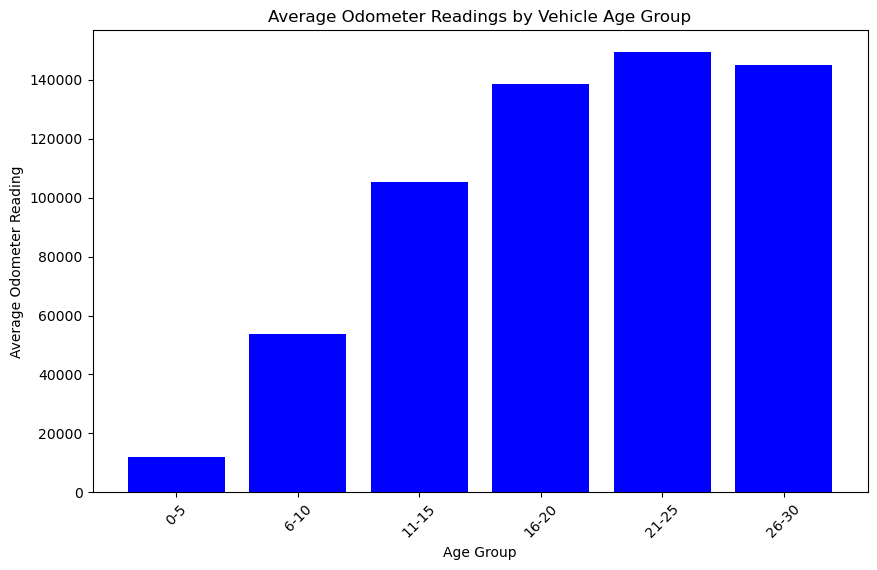

In [59]:
#find the mean odometer reading for each age group and plot
average_odometer = df.groupby('age_group').agg({'odometer': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_odometer['age_group'], average_odometer['odometer'], color='blue')
plt.xlabel('Age Group')
plt.ylabel('Average Odometer Reading')
plt.title('Average Odometer Readings by Vehicle Age Group')
plt.xticks(rotation=45) 

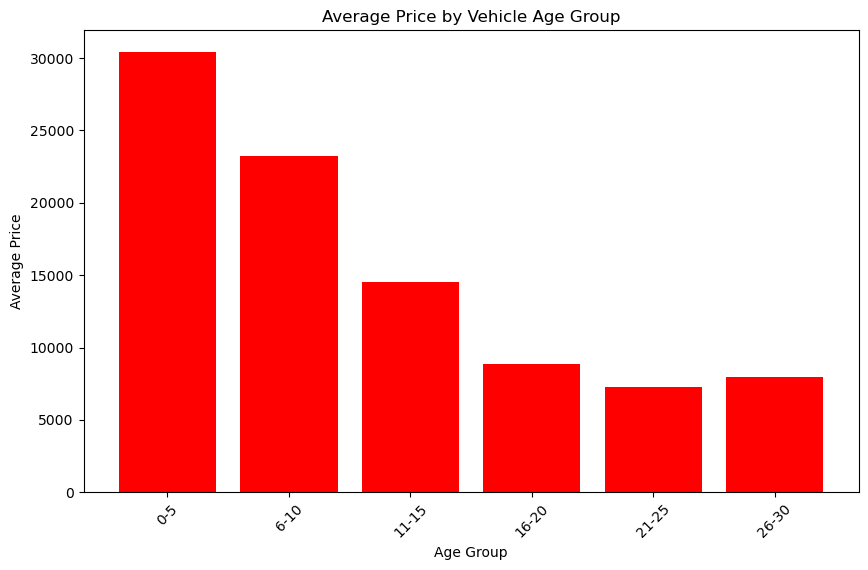

In [60]:
#find the average price for each age group and plot
average_age = df.groupby('age_group').agg({'price': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_age['age_group'], average_age['price'], color='red')
plt.xlabel('Age Group')
plt.ylabel('Average Price')
plt.title('Average Price by Vehicle Age Group')
plt.xticks(rotation=45)  # Helps in making age group labels more readable
plt.show()


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '0-25000'),
  Text(1, 0, '25-50000'),
  Text(2, 0, '50-75000'),
  Text(3, 0, '75-100000'),
  Text(4, 0, '10-125000'),
  Text(5, 0, '125-150000'),
  Text(6, 0, '150k-1000000')])

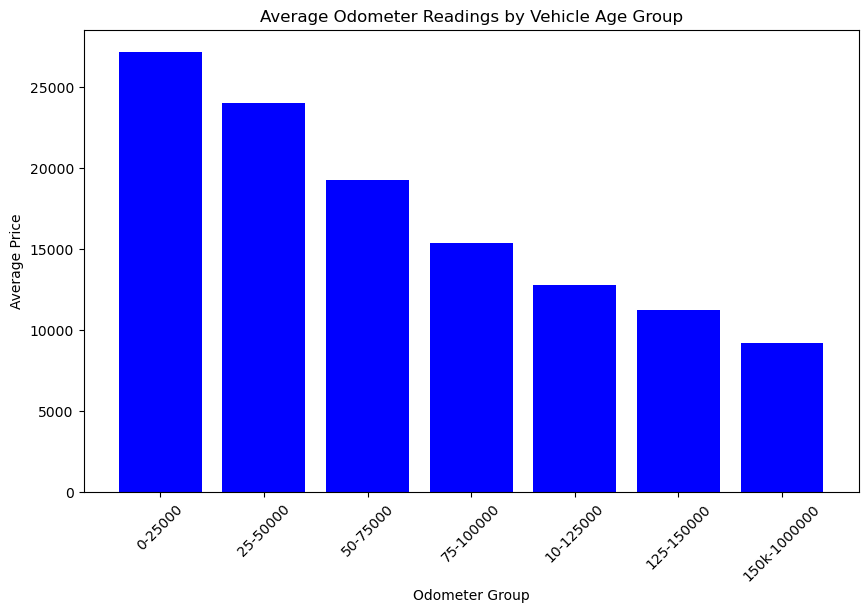

In [61]:
#find the average price for each odometer group and plot
bins = [0,25000,50000,75000,100000,125000,150000,1000000] 
labels = ['0-25000','25-50000', '50-75000', '75-100000','10-125000', '125-150000', '150k-1000000']
df['milage_range']= pd.cut(df['odometer'], bins=bins, labels=labels, right=False)

average_odometer = df.groupby('milage_range').agg({'price': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_odometer['milage_range'], average_odometer['price'], color='blue')
plt.xlabel('Odometer Group')
plt.ylabel('Average Price')
plt.title('Average Odometer Readings by Vehicle Age Group')
plt.xticks(rotation=45) 

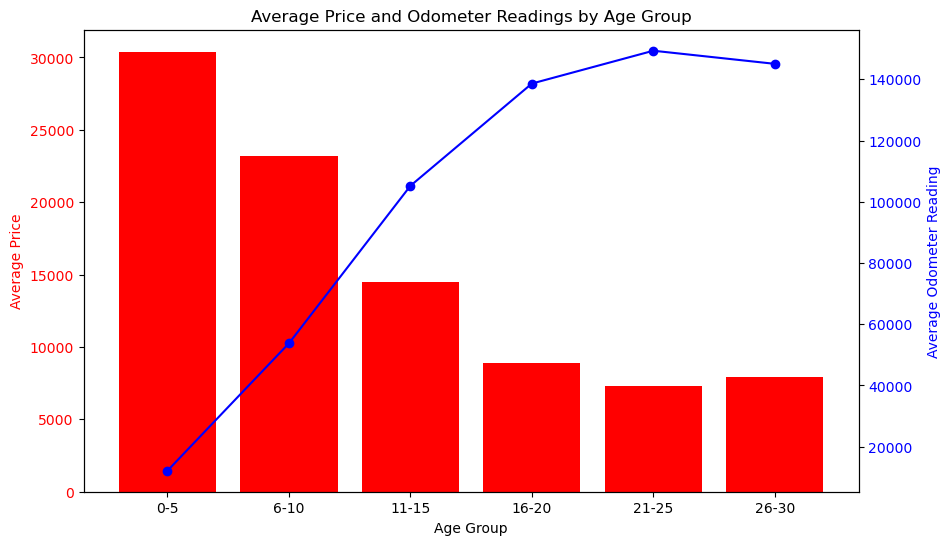

In [62]:
#Plot the average price and odometer reading by age group
bins = [0, 5, 10, 15, 20, 25, 30, 35] 
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

average_data = df.groupby('age_group').agg({'price': 'mean', 'odometer': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Price', color='red')
ax1.bar(average_data['age_group'], average_data['price'], color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Odometer Reading', color='blue')  
ax2.plot(average_data['age_group'], average_data['odometer'], color='blue', marker='o')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Average Price and Odometer Readings by Age Group')
plt.show()



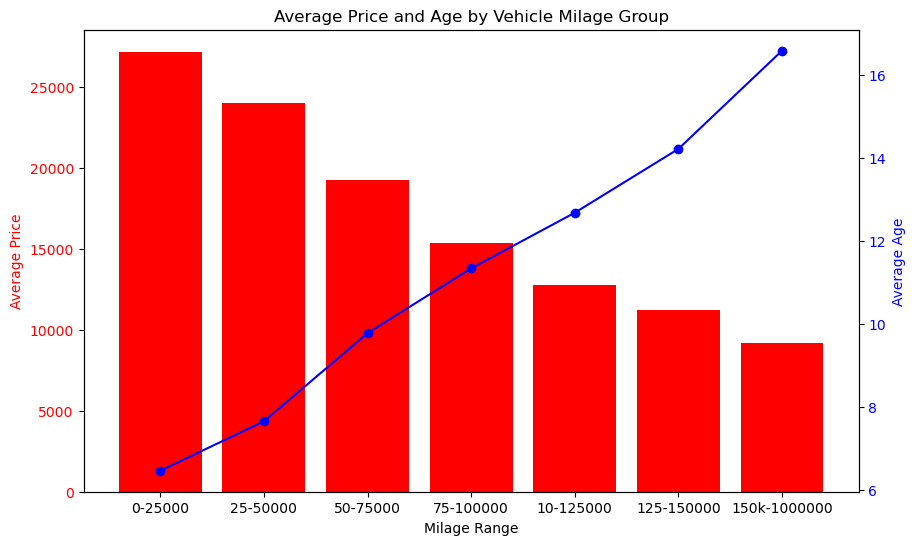

In [63]:
#plot the average price and average age by odometer group
bins = [0,25000,50000,75000,100000,125000,150000,1000000] 
labels = ['0-25000','25-50000', '50-75000', '75-100000','10-125000', '125-150000', '150k-1000000']
df['milage_range']= pd.cut(df['odometer'], bins=bins, labels=labels, right=False)
car_counts = df['milage_range'].value_counts().sort_index()  

average_data = df.groupby('milage_range').agg({'age': 'mean', 'price': 'mean'}).reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Milage Range')
ax1.set_ylabel('Average Price', color="red")
ax1.bar(average_data['milage_range'], average_data['price'], color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Age',color='blue') 
ax2.plot(average_data['milage_range'], average_data['age'],color='blue', marker='o')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Average Price and Age by Vehicle Milage Group')
plt.show()

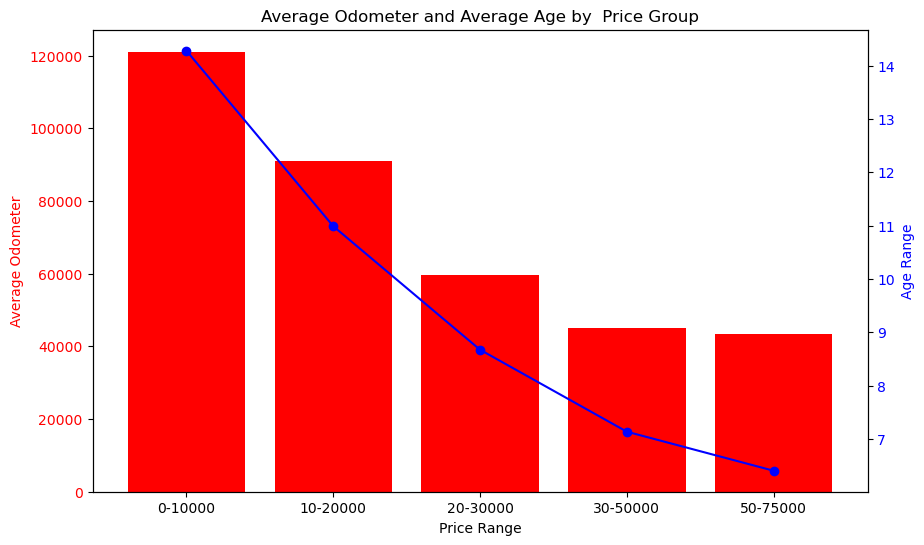

In [64]:
#plot the average odometer and age rance by price group
bins = [0, 10000, 20000, 30000, 50000, 75000]
labels = ['0-10000', '10-20000', '20-30000', '30-50000', '50-75000']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)
price_counts = df['price_range'].value_counts().sort_index()

average_data = df.groupby('price_range').agg({'odometer': 'mean', 'age': 'mean'}).reset_index()
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Price Range')
ax1.set_ylabel('Average Odometer', color="red")
ax1.bar(average_data['price_range'], average_data['odometer'], color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Age Range',color='blue') 
ax2.plot(average_data['price_range'], average_data['age'],color='blue', marker='o')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Average Odometer and Average Age by  Price Group')
plt.show()

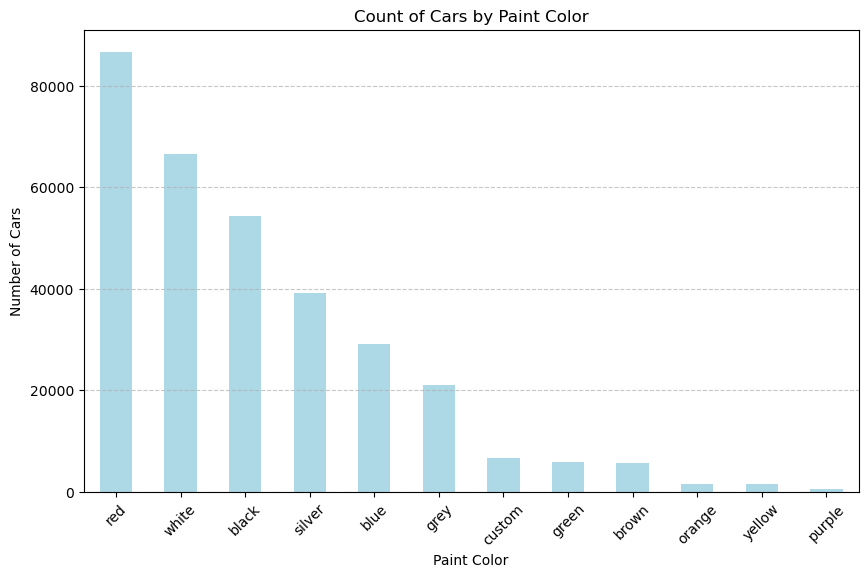

In [65]:
#count of cars by paint color
color_counts = df['paint_color'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='lightblue') 
plt.xlabel('Paint Color')
plt.ylabel('Number of Cars')
plt.title('Count of Cars by Paint Color')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

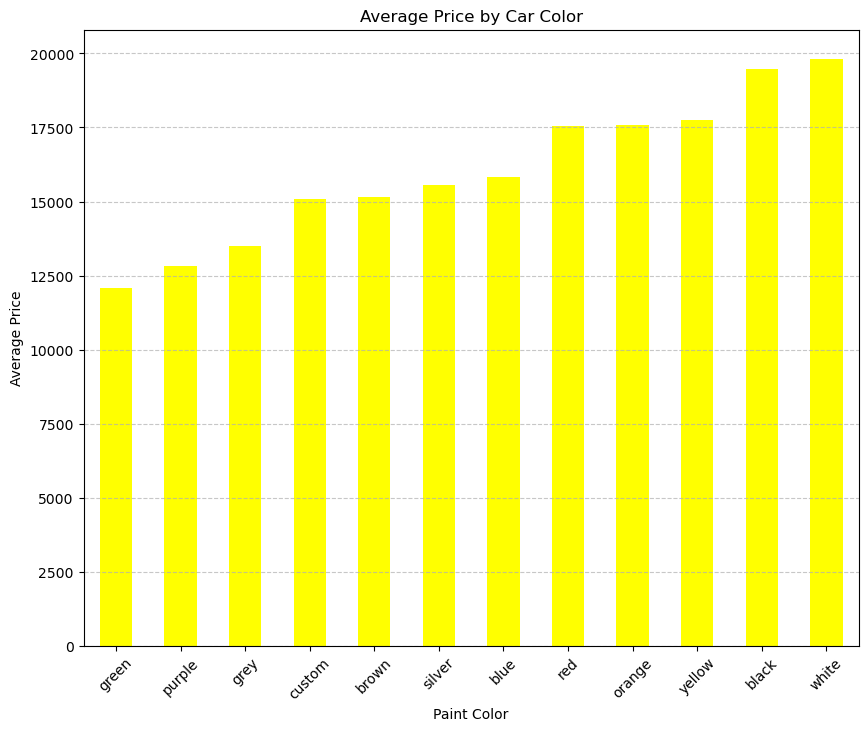

In [66]:

price_by_color = df.groupby('paint_color')['price'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 8))
price_by_color.plot(kind='bar', color='yellow')
plt.xlabel('Paint Color')
plt.ylabel('Average Price')
plt.title('Average Price by Car Color')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

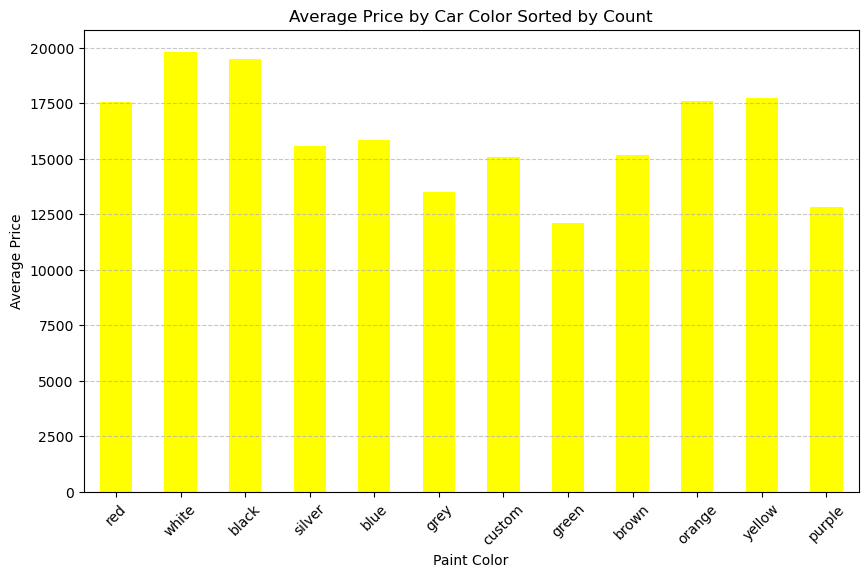

In [67]:
count_by_color = color_counts.to_frame(name='count')

merged = price_by_color.to_frame().merge(color_counts, left_index=True, right_index=True)

# Sort the merged data by the count of cars so columns for count are in same order is average price by color
color_sorted = merged.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 6))
color_sorted['price'].plot(kind='bar', color='yellow')
plt.xlabel('Paint Color')
plt.ylabel('Average Price')
plt.title('Average Price by Car Color Sorted by Count')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding a grid for easier interpretation of values
plt.show()

In [68]:
car_encoded=df

In [69]:
car_encoded.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,age,age_group,odometer_group,milage_range,price_range
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,fwd,pickup,white,al,10.0,11-15,50-75,50-75000,30-50000
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,fwd,pickup,blue,al,14.0,11-15,50-75,50-75000,20-30000
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,rwd,pickup,red,al,4.0,0-5,0-25,0-25000,30-50000
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,fwd,pickup,red,al,7.0,6-10,25-50,25-50000,30-50000
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,pickup,black,al,11.0,11-15,125-150,125-150000,10-20000


In [70]:
from sklearn.preprocessing import OrdinalEncoder


categorical_features = ['paint_color', 'type', 'drive', 'title_status', 
                        'fuel', 'cylinders', 'condition', 'model', 
                        'manufacturer', 'transmission', 'state']

#ordinalEncoder
ordinal_encoder = OrdinalEncoder()

# fitcategorical data
car_encoded[categorical_features] = ordinal_encoder.fit_transform(car_encoded[categorical_features])


In [71]:
car_encoded.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,age,age_group,odometer_group,milage_range,price_range
27,33590,2014.0,22.0,16579.0,2.0,6.0,2.0,57923.0,0.0,2.0,1.0,8.0,10.0,1.0,10.0,11-15,50-75,50-75000,30-50000
28,22590,2010.0,16.0,16870.0,2.0,6.0,2.0,71229.0,0.0,2.0,1.0,8.0,1.0,1.0,14.0,11-15,50-75,50-75000,20-30000
29,39590,2020.0,16.0,16909.0,2.0,6.0,2.0,19160.0,0.0,2.0,2.0,8.0,8.0,1.0,4.0,0-5,0-25,0-25000,30-50000
30,30990,2017.0,47.0,19200.0,2.0,6.0,2.0,41124.0,0.0,2.0,1.0,8.0,8.0,1.0,7.0,6-10,25-50,25-50000,30-50000
31,15000,2013.0,21.0,9311.0,0.0,5.0,2.0,128000.0,0.0,0.0,2.0,8.0,0.0,1.0,11.0,11-15,125-150,125-150000,10-20000


In [72]:
car_encoded.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state', 'age', 'age_group', 'odometer_group',
       'milage_range', 'price_range'],
      dtype='object')

In [73]:
car_encoded=car_encoded.drop(columns=['age', 'age_group', 'odometer_group',
       'milage_range', 'price_range'])

In [74]:
car_encoded.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,33590,2014.0,22.0,16579.0,2.0,6.0,2.0,57923.0,0.0,2.0,1.0,8.0,10.0,1.0
28,22590,2010.0,16.0,16870.0,2.0,6.0,2.0,71229.0,0.0,2.0,1.0,8.0,1.0,1.0
29,39590,2020.0,16.0,16909.0,2.0,6.0,2.0,19160.0,0.0,2.0,2.0,8.0,8.0,1.0
30,30990,2017.0,47.0,19200.0,2.0,6.0,2.0,41124.0,0.0,2.0,1.0,8.0,8.0,1.0
31,15000,2013.0,21.0,9311.0,0.0,5.0,2.0,128000.0,0.0,0.0,2.0,8.0,0.0,1.0


In [75]:
corr=car_encoded.corr()
corr.style.background_gradient(cmap='coolwarm')

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
price,1.000000,0.495977,-0.038135,0.037651,0.132766,0.223420,0.031798,-0.469534,-0.064739,0.361025,-0.035439,0.020189,0.015231,0.019598
year,0.495977,1.000000,0.003275,0.022537,0.165577,-0.023667,0.166987,-0.662409,-0.016176,0.305784,0.000589,0.021787,0.016904,0.017741
manufacturer,-0.038135,0.003275,1.000000,0.033592,-0.008679,-0.094664,-0.006512,0.018755,0.013381,-0.003291,-0.110550,0.040984,-0.003428,-0.007963
model,0.037651,0.022537,0.033592,1.000000,-0.012832,0.053878,0.063147,0.001274,-0.010786,0.020242,-0.095055,-0.110827,0.008491,0.008179
condition,0.132766,0.165577,-0.008679,-0.012832,1.000000,0.031462,0.050807,-0.187612,0.010274,0.150416,0.057902,0.038214,0.022573,0.030885
cylinders,0.223420,-0.023667,-0.094664,0.053878,0.031462,1.000000,-0.005933,-0.016058,-0.043999,0.171483,-0.066369,0.006417,0.007904,0.073557
fuel,0.031798,0.166987,-0.006512,0.063147,0.050807,-0.005933,1.000000,-0.206757,-0.024451,0.291755,0.093036,-0.039349,-0.051756,-0.026956
odometer,-0.469534,-0.662409,0.018755,0.001274,-0.187612,-0.016058,-0.206757,1.000000,0.000172,-0.428232,-0.099109,-0.012279,-0.005482,-0.003454
title_status,-0.064739,-0.016176,0.013381,-0.010786,0.010274,-0.043999,-0.024451,0.000172,1.000000,-0.066711,-0.009702,-0.001698,-0.025297,0.004641
transmission,0.361025,0.305784,-0.003291,0.020242,0.150416,0.171483,0.291755,-0.428232,-0.066711,1.000000,0.143276,0.045705,-0.006741,-0.002363


In [76]:
column_names= [
 
'paint_color',
'type', 
'drive',
'title_status', 
'fuel', 
'cylinders',
'condition', 
'model', 
'manufacturer', 
'transmission',
 'state','year','odometer',"price"]
car_final= car_encoded.reindex(columns = column_names)
car_final.head()

,paint_color,type,drive,title_status,fuel,cylinders,condition,model,manufacturer,transmission,state,year,odometer,price
27,10.0,8.0,1.0,0.0,2.0,6.0,2.0,16579.0,22.0,2.0,1.0,2014.0,57923.0,33590
28,1.0,8.0,1.0,0.0,2.0,6.0,2.0,16870.0,16.0,2.0,1.0,2010.0,71229.0,22590
29,8.0,8.0,2.0,0.0,2.0,6.0,2.0,16909.0,16.0,2.0,1.0,2020.0,19160.0,39590
30,8.0,8.0,1.0,0.0,2.0,6.0,2.0,19200.0,47.0,2.0,1.0,2017.0,41124.0,30990
31,0.0,8.0,2.0,0.0,2.0,5.0,0.0,9311.0,21.0,0.0,1.0,2013.0,128000.0,15000


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [105]:
model = LinearRegression()


In [79]:
from sklearn.model_selection import train_test_split
X=car_final[[
  
'paint_color',
'type', 
'drive',
'title_status', 
'fuel', 
'cylinders',
'condition', 
'model', 
'manufacturer', 
'transmission',
 'state','year','odometer']]
y=car_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [107]:
X.head()

,paint_color,type,drive,title_status,fuel,cylinders,condition,model,manufacturer,transmission,state,year,odometer
27,10.0,8.0,1.0,0.0,2.0,6.0,2.0,16572.0,22.0,2.0,1.0,2014.0,57923.0
28,1.0,8.0,1.0,0.0,2.0,6.0,2.0,16863.0,16.0,2.0,1.0,2010.0,71229.0
29,8.0,8.0,2.0,0.0,2.0,6.0,2.0,16902.0,16.0,2.0,1.0,2020.0,19160.0
30,8.0,8.0,1.0,0.0,2.0,6.0,2.0,19193.0,47.0,2.0,1.0,2017.0,41124.0
31,0.0,8.0,2.0,0.0,2.0,5.0,0.0,9307.0,21.0,0.0,1.0,2013.0,128000.0


In [108]:
model.fit(X_train, y_train)
r2 = model.score(X_train, y_train)
print(r2)

0.37013719660730815


In [109]:
#feature selector
from sklearn.feature_selection import SequentialFeatureSelector
# Perform forward feature selection
forward_selector = SequentialFeatureSelector(model, direction='forward', n_features_to_select='auto')
forward_selector.fit(X_train, y_train)

# Get the selected features
selected_features_forward = X.columns[forward_selector.get_support()]
print("Selected features (Forward Selection):", selected_features_forward)
# Perform backward feature elimination
backward_selector = SequentialFeatureSelector(model, direction='backward', n_features_to_select='auto')
backward_selector.fit(X_train, y_train)


Selected features (Forward Selection): Index(['drive', 'fuel', 'cylinders', 'transmission', 'year', 'odometer'], dtype='object')


SequentialFeatureSelector(direction='backward', estimator=LinearRegression())

In [110]:
X=car_final[['drive', 'fuel', 'cylinders', 'transmission', 'year', 'odometer']]
y=car_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [111]:
model.fit(X_train, y_train)
r2 = model.score(X_train, y_train)
print(r2)

0.36698012496680765


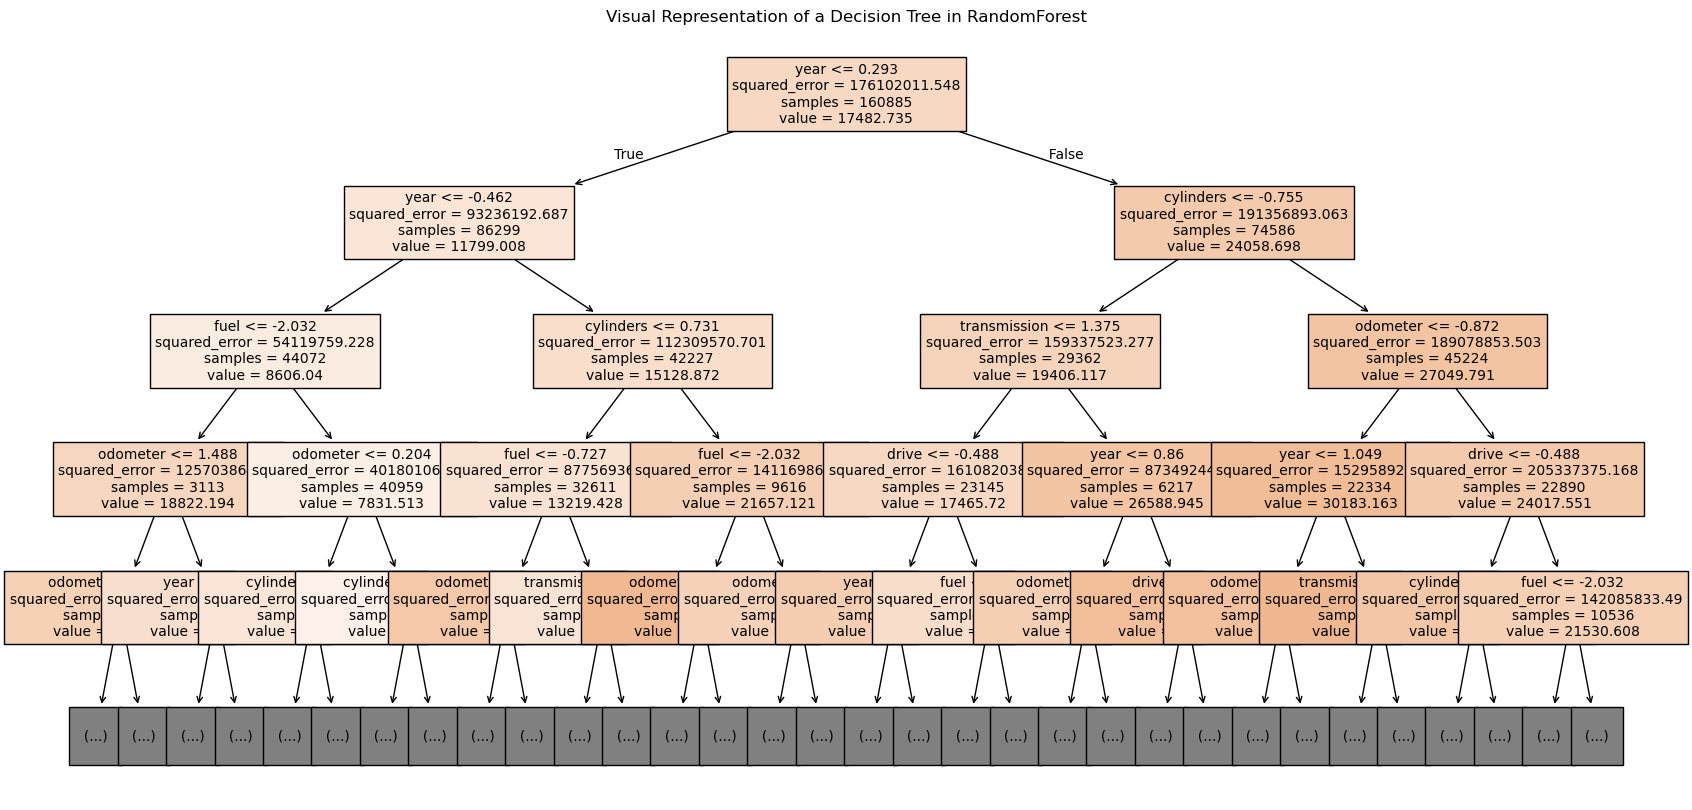

In [117]:
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators=20, random_state=0)
forest.fit(X_train, y_train)  # Ensure the forest is trained

# Select one of the trees
tree = forest.estimators_[0]

# Set up the plot size
plt.figure(figsize=(20,10))

# Plot the decision tree
plot_tree(tree, filled=True, feature_names=X_train.columns, max_depth=4, fontsize=10)
plt.title('Visual Representation of a Decision Tree in RandomForest')
plt.show()


In [118]:
forest.fit(X_train, y_train)


RandomForestRegressor(n_estimators=20, random_state=0)

In [119]:
r2=forest.score(X_train,y_train)
print(r2)

0.9358773580559722


In [120]:
r2_test=forest.score(X_test,y_test)
print(r2_test)

0.6950691398072084


In [81]:
from sklearn.ensemble import RandomForestRegressor

# Try different numbers of trees
for n in [10, 50, 100, 200]:
    forest = RandomForestRegressor(n_estimators=n, random_state=42)
    forest.fit(X_train, y_train)
    r2_train = forest.score(X_train, y_train)
    r2_test = forest.score(X_test, y_test)
    print(f"n_estimators={n} | Train R2: {r2_train:.4f}, Test R2: {r2_test:.4f}")


n_estimators=10 | Train R2: 0.9600, Test R2: 0.8047
n_estimators=50 | Train R2: 0.9692, Test R2: 0.8206
n_estimators=100 | Train R2: 0.9703, Test R2: 0.8220
n_estimators=200 | Train R2: 0.9709, Test R2: 0.8227


In [82]:
# Try different maximum depths
for depth in [5, 10, 20, None]:
    forest = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=42)
    forest.fit(X_train, y_train)
    r2_train = forest.score(X_train, y_train)
    r2_test = forest.score(X_test, y_test)
    print(f"max_depth={depth} | Train R2: {r2_train:.4f}, Test R2: {r2_test:.4f}")


max_depth=5 | Train R2: 0.4413, Test R2: 0.4417
max_depth=10 | Train R2: 0.6126, Test R2: 0.5988
max_depth=20 | Train R2: 0.9287, Test R2: 0.8045
max_depth=None | Train R2: 0.9703, Test R2: 0.8220


In [83]:
forest = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [84]:
r2=forest.score(X_train,y_train)
print(r2)

0.9294617801191764


In [85]:
r2_test=forest.score(X_test,y_test)
print(r2_test)

0.8053240430066857


In [117]:

#create new data frame to predict car price
new_df = pd.DataFrame({
    'paint_color': ['white'],  
    'type': ['SUV'],
    'drive': ['4wd'],
    'title_status': ['clean'],
    'fuel': ['diesel'],
    'cylinders': ['4 cylinders'],
    'condition': ['fair'],
    'model': ['rav4'],
    'manufacturer': ['toyota'],
    'transmission': ['automatic'],
    'state': ['ny'],
    'year': 2007,  
    'odometer': [100000]
})

categorical_features = ['paint_color', 'type', 'drive', 'title_status', 
                        'fuel', 'cylinders', 'condition', 'model', 
                        'manufacturer', 'transmission', 'state']
new_df[categorical_features] = ordinal_encoder.transform(new_df[categorical_features])

predicted_price = forest.predict(new_df)
print(f"The predicted price is: ${predicted_price[0]:,.2f}")

The predicted price is: $9,767.87
